In [ ]:
# importing the libraries

# to make dataframe(ie structured tabular form)
import pandas as pd
# for working with arrays
import numpy as np
# for making plots
import matplotlib.pyplot as plt
import seaborn as sns

# to split the original data
from sklearn.model_selection import train_test_split, cross_val_score
# to train with Linear Regression
from sklearn.linear_model import LinearRegression
# to evaluate our model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# to scalling to a given range
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# data collection and processing

# loading the data from file to pandas dataframe
df = pd.read_csv('/Clean_Dataset.csv.zip')

# inspecting the first 5 rows of dataframe
print('\n Head')
display(df.head())
# checking number of rows and columns
print('\n Shape')
display(df.shape)
# information about dataset
print('\n Data Type')
display(df.dtypes)
# checking number of missing value
print('\n NAN Values')
display(df.isnull().sum())
# description of dataframe
print('\n Statistics')
display(df.describe().T)


 Head


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955



 Shape


(300153, 12)


 Data Type


Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object


 NAN Values


Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


 Statistics


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,300153.0,150076.000000,86646.852011,0.00,75038.00,150076.00,225114.00,300152.00
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [ ]:
# all possible categoric features
cat_features = [column for column in df.columns if df[column].dtype in ["object","catagory","bool"]]

# numeric but catagoric features
num_but_cat_features = [column for column in df.columns if (df[column].dtype in ["int64", "float64"]) and (df[column].nunique()<9)]

# categoric but cardinal features
cat_but_card_features = [column for column in df.columns if (df[column].dtype in ["object", "catagory", "boool"]) and (df[column].nunique()>36)]

# categoric features (final situation for categoric features)
categoric_features = cat_features + num_but_cat_features
categoric_features = [column for column in categoric_features if column not in cat_but_card_features]

df[categoric_features]

,airline,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy
...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business


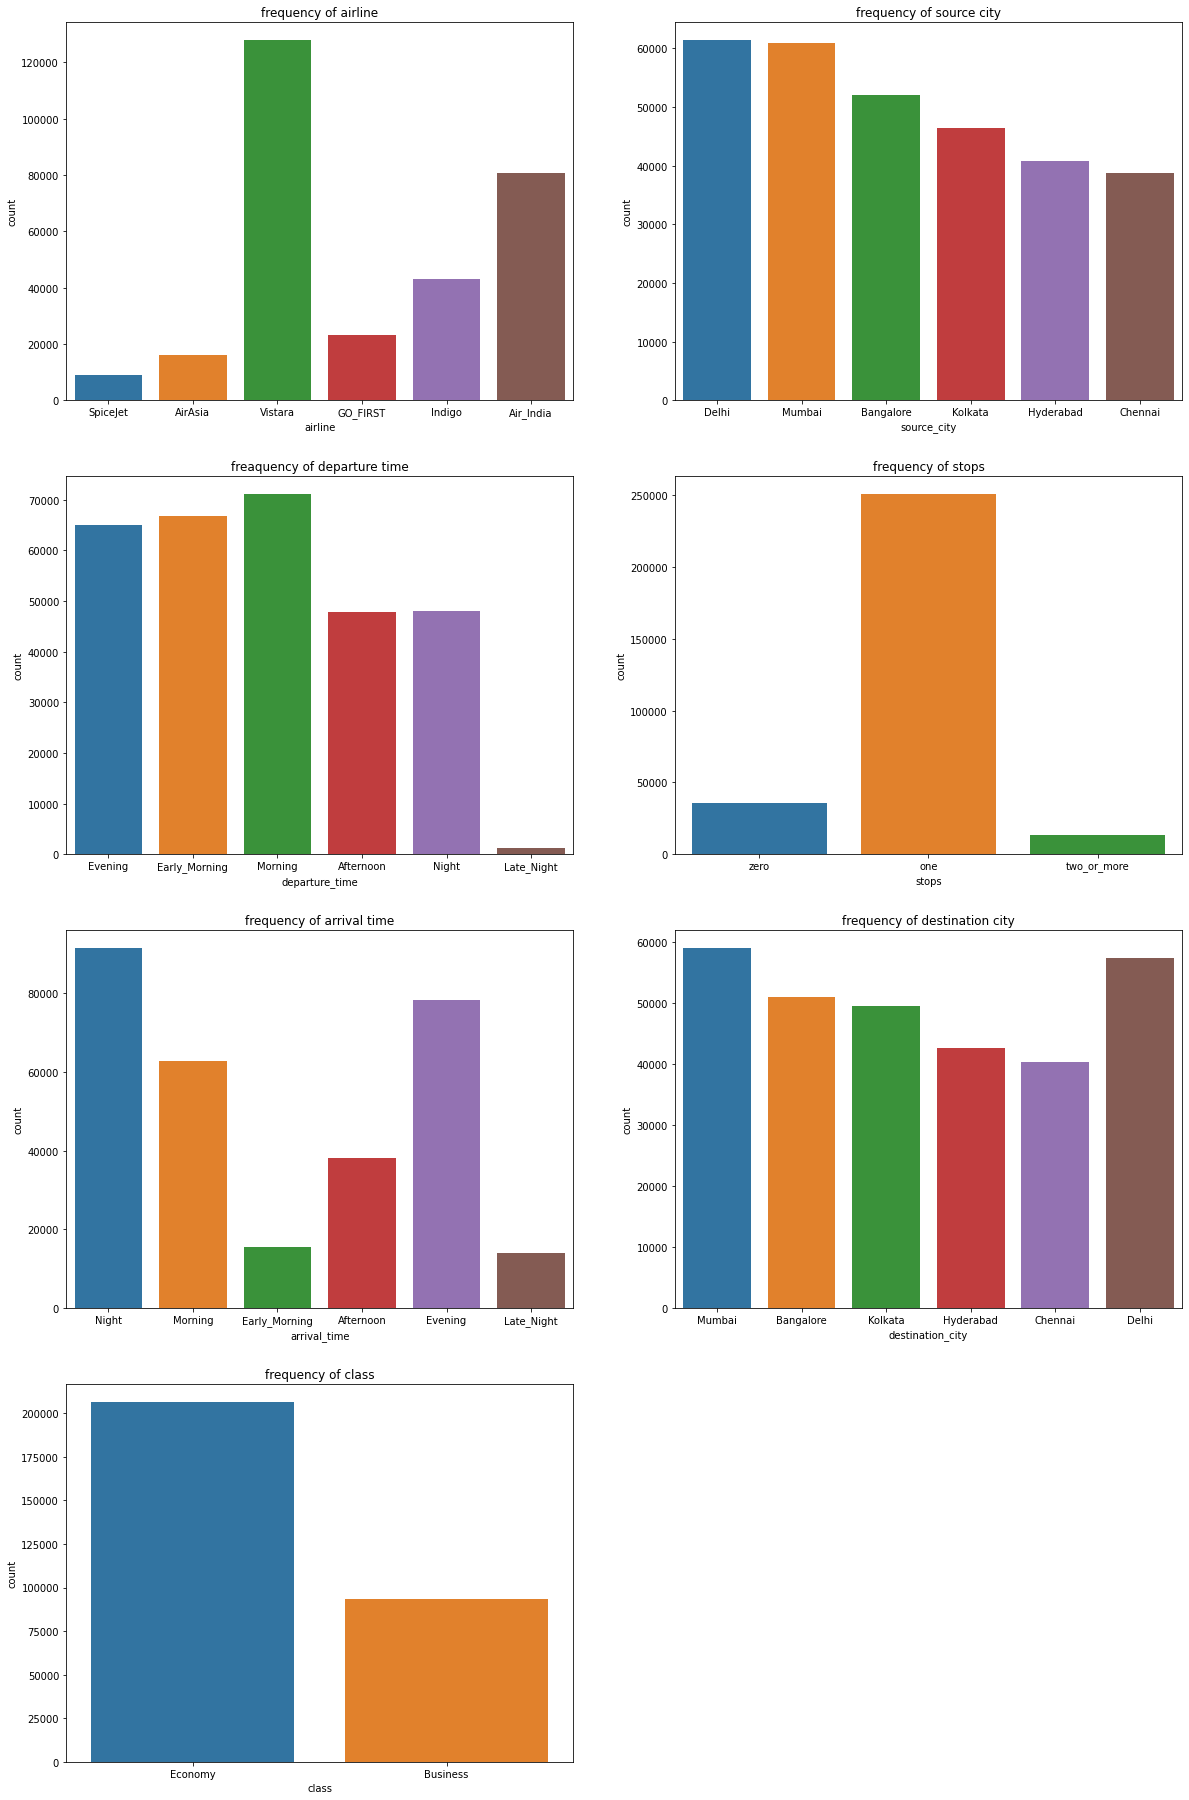

In [ ]:
# visualization of catagoric features  with countplot
plt.figure(figsize=(20,32))

plt.subplot(4,2,1)
sns.countplot(x=df["airline"], data=df)
plt.title("frequency of airline")

plt.subplot(4,2,2)
sns.countplot(x=df["source_city"], data=df)
plt.title('frequency of source city')

plt.subplot(4,2,3)
sns.countplot(x=df["departure_time"], data=df)
plt.title('freaquency of departure time')

plt.subplot(4,2,4)
sns.countplot(x=df["stops"], data=df)
plt.title('frequency of stops')

plt.subplot(4,2,5)
sns.countplot(x=df["arrival_time"], data=df)
plt.title('frequency of arrival time')

plt.subplot(4,2,6)
sns.countplot(x=df["destination_city"], data=df)
plt.title('frequency of destination city')

plt.subplot(4,2,7)
sns.countplot(x=df["class"], data=df)
plt.title("frequency of class")

plt.show()

In [ ]:
# numeric features in dataframe
numeric_features = [column for column in df.columns if (df[column].dtype in["int64", "float64"]) and (column not in categoric_features)]
df[numeric_features]

,Unnamed: 0,duration,days_left,price
0,0,2.17,1,5953
1,1,2.33,1,5953
2,2,2.17,1,5956
3,3,2.25,1,5955
4,4,2.33,1,5955
...,...,...,...,...
300148,300148,10.08,49,69265
300149,300149,10.42,49,77105
300150,300150,13.83,49,79099
300151,300151,10.00,49,81585


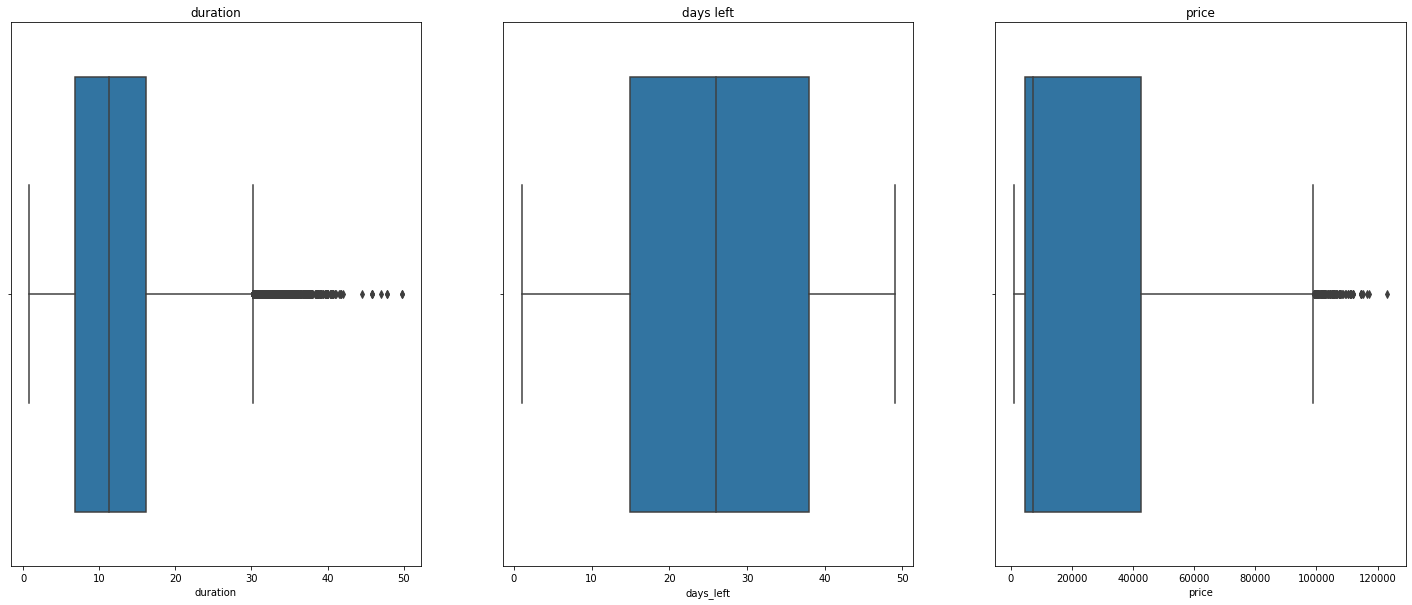

In [ ]:
# visualizations of numeric features with boxplot
plt.figure(figsize=(25,10))

plt.subplot(1,3,1)
sns.boxplot(x=df["duration"], data=df)
plt.title('duration')

plt.subplot(1,3,2)
sns.boxplot(x=df["days_left"], data=df)
plt.title('days left')

plt.subplot(1,3,3)
sns.boxplot(x=df["price"], data=df)
plt.title('price')

plt.show()

In [ ]:
# target variable analysis
target = "price"

for feature in categoric_features:
  print("\n ____")
  analysis = df.groupby(feature).agg({target : ["mean"]})
  print('analysis with "{}":\n\n'.format(feature), analysis)



 ____
analysis with "airline":

                   price
                   mean
airline                
AirAsia     4091.072742
Air_India  23507.019112
GO_FIRST    5652.007595
Indigo      5324.216303
SpiceJet    6179.278881
Vistara    30396.536302

 ____
analysis with "source_city":

                     price
                     mean
source_city              
Bangalore    21469.460575
Chennai      21995.339871
Delhi        18951.326639
Hyderabad    20155.623879
Kolkata      21746.235679
Mumbai       21483.818839

 ____
analysis with "departure_time":

                        price
                        mean
departure_time              
Afternoon       18179.203331
Early_Morning   20370.676718
Evening         21232.361894
Late_Night       9295.299387
Morning         21630.760254
Night           23062.146808

 ____
analysis with "stops":

                     price
                     mean
stops                    
one          22900.992482
two_or_more  14113.450775
zero          

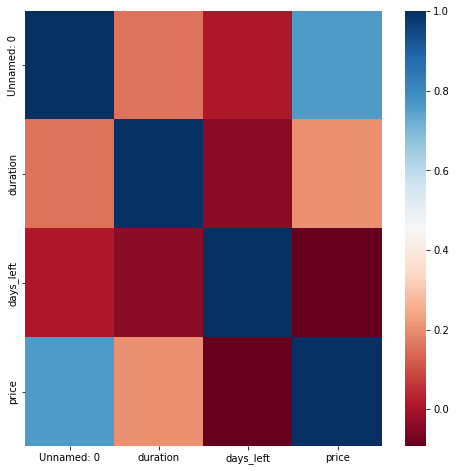

In [ ]:
# correlation analysis

corr = df[numeric_features].corr()

# heatmap to look at correlation
plt.figure(figsize=(8,8))
sns.heatmap(corr, cmap="RdBu")

plt.show()